In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist['target'][0]

'5'

In [4]:
import numpy as np

X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

In [5]:
X.shape

(70000, 784)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, 
               cmap=mpl.cm.binary,    # grayscale
               interpolation="nearest"
              )

plot_digit(X[2])
#plt.show()

In [7]:
y[1]

0

In [8]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [29]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test  == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
sgd_clf.predict(X_test[0:20, :])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

In [32]:
y_test_5[0:20]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False])

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [44]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [42]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [48]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [51]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

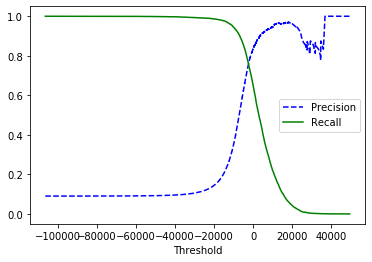

In [59]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
    

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [95]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10

In [65]:
y_probas_forest

array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [66]:
y_scores_forest=y_probas_forest[:, 1]

In [67]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [68]:
y_scores_forest

array([0.9, 0. , 0.1, ..., 1. , 0. , 0. ])

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

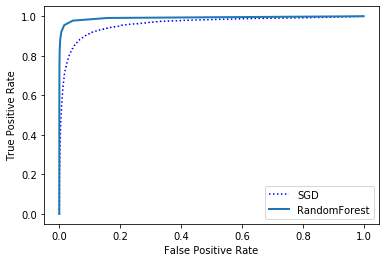

In [87]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="RandomForest")
plt.legend()

In [88]:
# --- ROC AUC (Receiver Operating Characteristics Area Under Curve)
# --- SGD
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [89]:
# --- ROC AUC (Receiver Operating Characteristics Area Under Curve)
# --- RandomForest
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

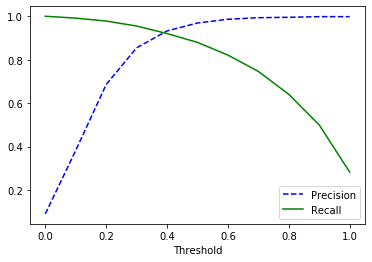

In [92]:
# --- Precision / recall curves against RandomForest

precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)

In [96]:
f1_score(y_train_5, y_train_pred_forest)

0.8961352657004831

In [97]:
# --- multiclass prediction score using Stochastic Gradient Descent

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [98]:
# --- multiclass prediction score using RandomForest

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.94116177, 0.93949697, 0.94374156])

In [106]:
# --- scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [107]:
# --- confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\ikuchin\AppData\Local\Continuum\miniconda3\envs\nnseries\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

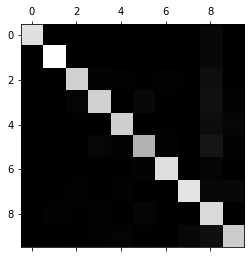

In [110]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [121]:
rows_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / rows_sum
np.fill_diagonal(norm_conf_mx, 0)

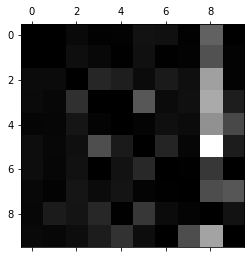

In [123]:
# --- confusion matrix w/o diagonal
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [136]:
np.random.randint(0, 100, (2, 3))

array([[95,  8, 30],
       [17,  9, 30]])

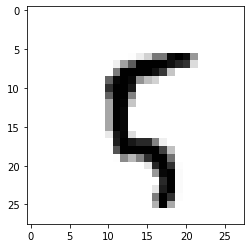

In [146]:
plot_digit(X[100])

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=22.4min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.4min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=11.9min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 34.3min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=12.2min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=12.2min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=12.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=12.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=12.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=12.2min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=12.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 378.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [12]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [13]:
grid_search.best_score_

0.9716166666666667

In [16]:
from sklearn.metrics import accuracy_score

knn_clf.fit(X_test, y_test)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9706

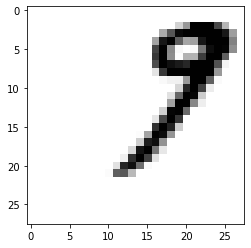

In [18]:
# --- image shift
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

plot_digit(shift_image(X[33], 5, -5));

In [98]:
X_train_augmented = [item for item in X_train]
y_train_augmented = [item for item in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [99]:
knn_clf_augmented = KNeighborsClassifier(n_neighbors=4, weights="distance") # --- put best params here
knn_clf_augmented.fit(X_train_augmented, y_train_augmented)
# knn_clf_augmented.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [100]:
y_pred_augmented = knn_clf_augmented.predict(X_test)
accuracy_score(y_test, y_pred_augmented)

0.9763

In [93]:
y_train_augmented[300000-10:]

array([8, 6, 4, 4, 4, 5, 7, 2, 0, 0], dtype=uint8)

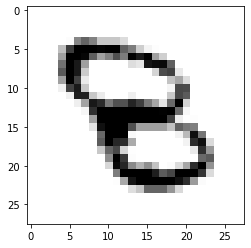

In [94]:
plot_digit(X_train_augmented[300000-10])